# XgBoost algorithm on WholeSale Datset

<b> Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset

data = r"C:\Users\santhosh\Downloads\Wholesale customers data.csv"

df = pd.read_csv(data)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.shape

(440, 8)

In [4]:

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<b> Data Clean

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.duplicated().sum()

0

<b> Exploratory Data Analysis

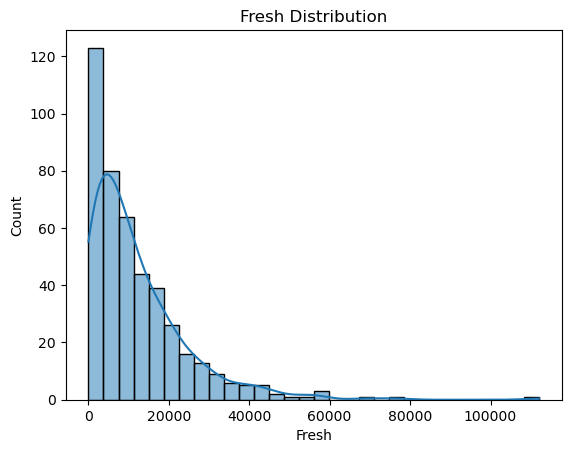

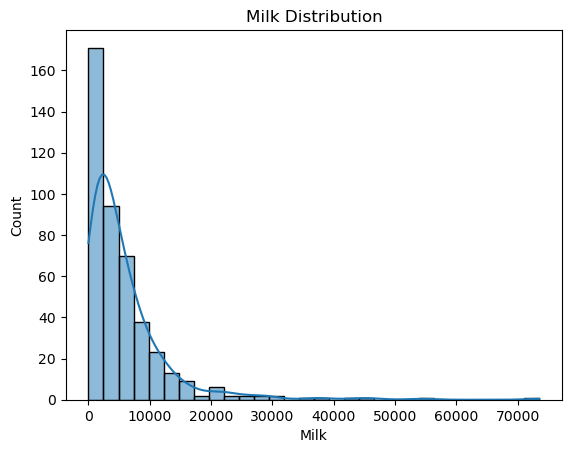

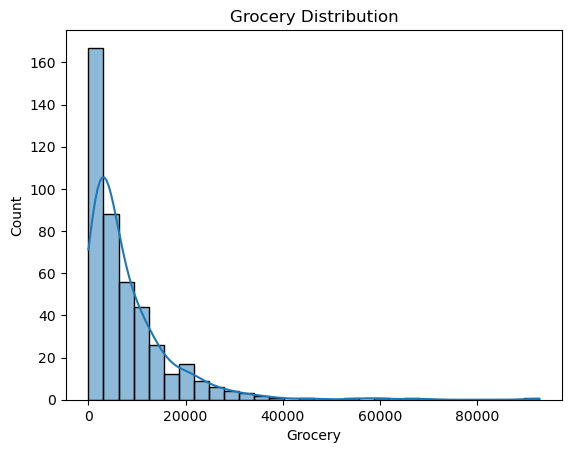

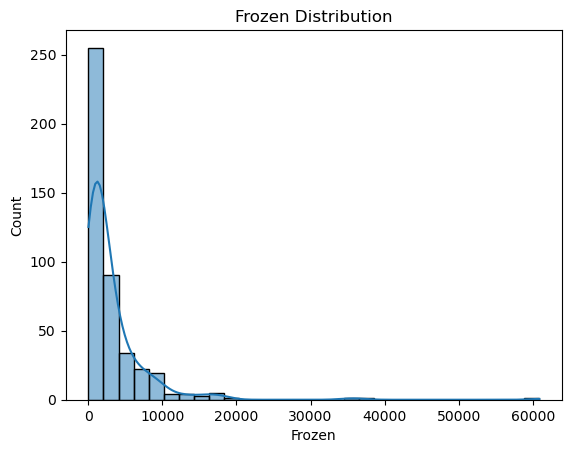

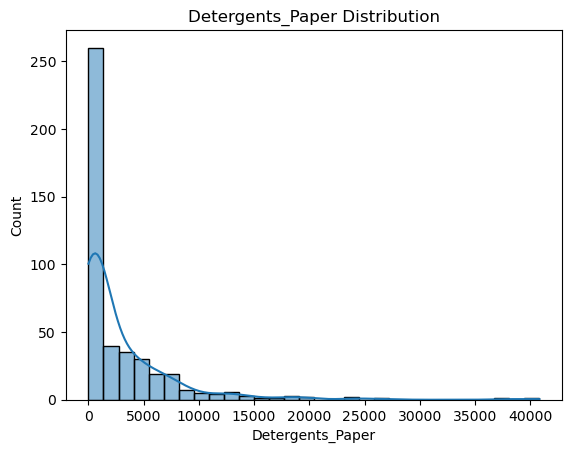

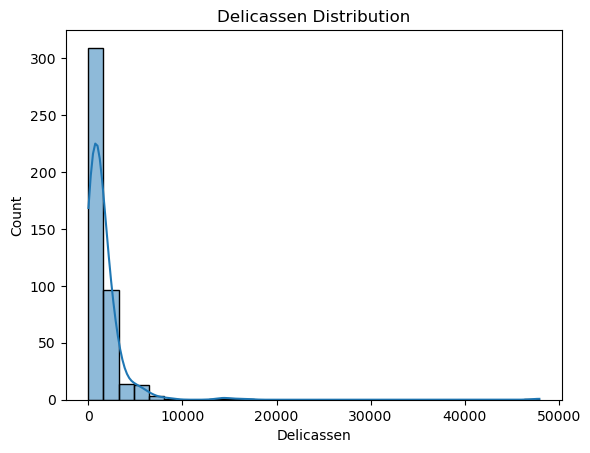

In [9]:
# Distribution of Fresh
sns.histplot(df['Fresh'], bins=30, kde=True)
plt.title('Fresh Distribution')
plt.show()

# Distribution of Milk
sns.histplot(df['Milk'], bins=30, kde=True)
plt.title('Milk Distribution')
plt.show()

# Distribution of Grocery
sns.histplot(df['Grocery'], bins=30, kde=True)
plt.title('Grocery Distribution')
plt.show()

# Distribution of Frozen
sns.histplot(df['Frozen'], bins=30, kde=True)
plt.title('Frozen Distribution')
plt.show()

# Distribution of Detergents_Paper
sns.histplot(df['Detergents_Paper'], bins=30, kde=True)
plt.title('Detergents_Paper Distribution')
plt.show()

# Distribution of Delicassen
sns.histplot(df['Delicassen'], bins=30, kde=True)
plt.title('Delicassen Distribution')
plt.show()


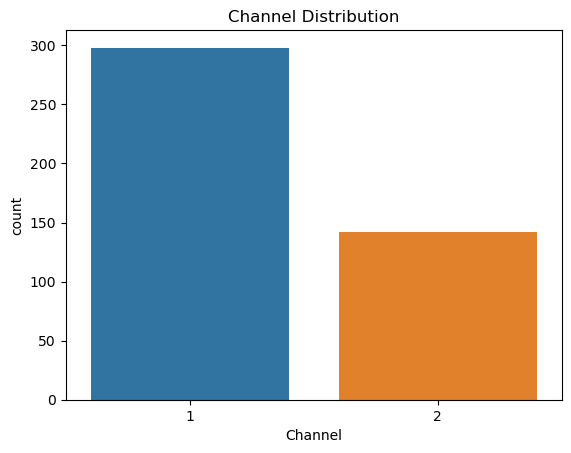

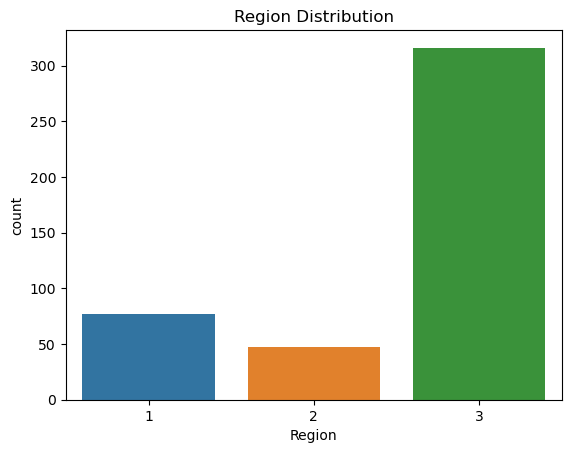

In [10]:
# Count plot for Channel
sns.countplot(x='Channel', data=df)
plt.title('Channel Distribution')
plt.show()

# Count plot for Region
sns.countplot(x='Region', data=df)
plt.title('Region Distribution')
plt.show()


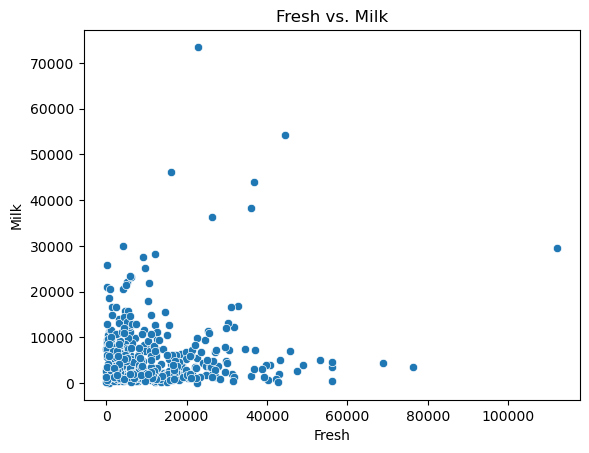

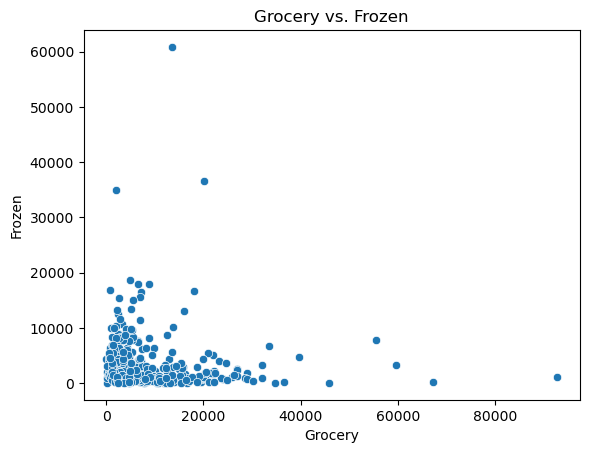

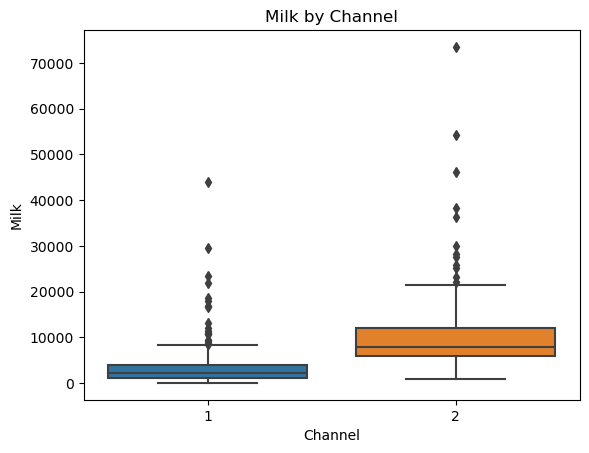

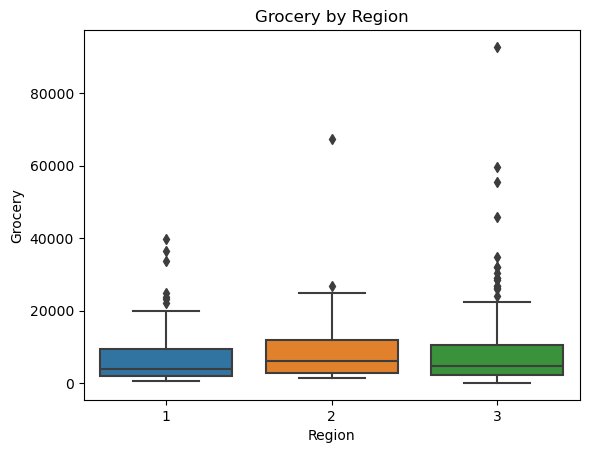

In [11]:
# Relationship between Fresh and Milk
sns.scatterplot(x='Fresh', y='Milk', data=df)
plt.title('Fresh vs. Milk')
plt.show()

# Relationship between Grocery and Frozen
sns.scatterplot(x='Grocery', y='Frozen', data=df)
plt.title('Grocery vs. Frozen')
plt.show()

# Box plot for Milk by Channel
sns.boxplot(x='Channel', y='Milk', data=df)
plt.title('Milk by Channel')
plt.show()

# Box plot for Grocery by Region
sns.boxplot(x='Region', y='Grocery', data=df)
plt.title('Grocery by Region')
plt.show()


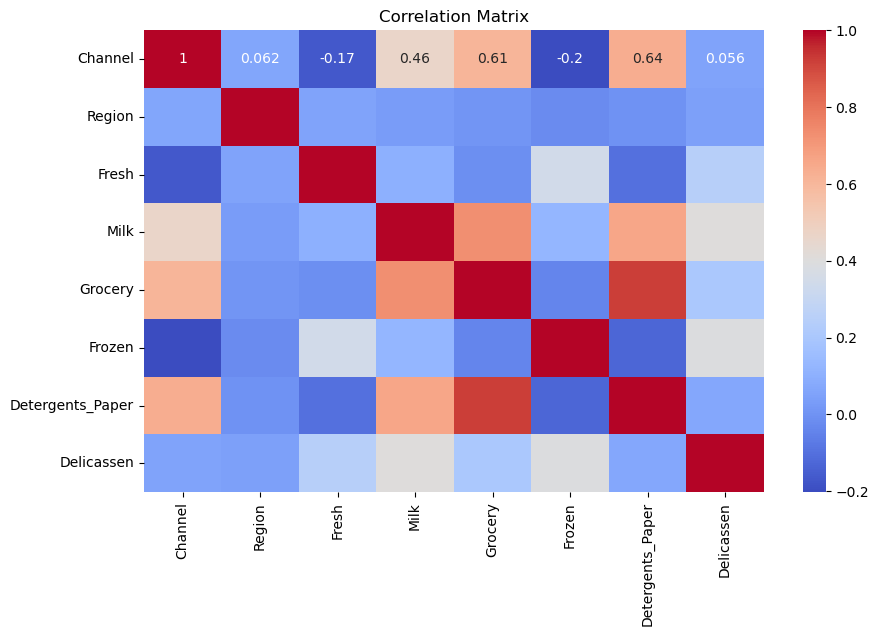

In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<b> Train-Test Split

In [14]:
X = df.drop('Channel', axis=1) #indepent

y = df['Channel'] #dependent

In [15]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [16]:
y.head(20)

0     2
1     2
2     2
3     1
4     2
5     2
6     2
7     2
8     1
9     2
10    2
11    2
12    2
13    2
14    2
15    1
16    2
17    1
18    2
19    1
Name: Channel, dtype: int64

In [17]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [18]:
# again preview the y label

y.head(20)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
Name: Channel, dtype: int64

In [19]:
!pip install xgboost

In [20]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<b> Applying Algorithm

In [23]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


<b> Predicted Values

In [25]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [26]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8788
